# No parallelization

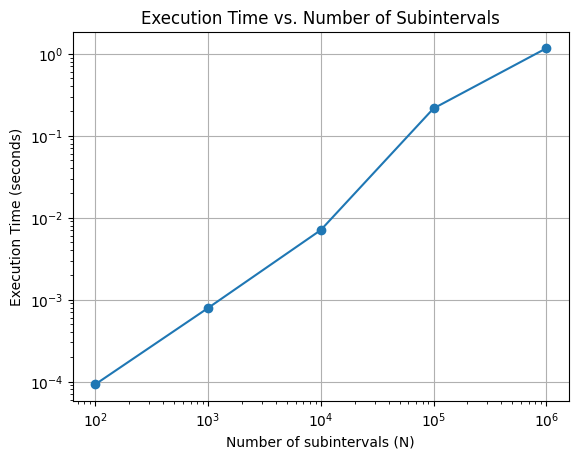

Number of CPU cores: 2
N=100: Execution time=0.000093 seconds
N=100: Consider parallelizing the code for better performance.
N=1000: Execution time=0.000790 seconds
N=1000: Consider parallelizing the code for better performance.
N=10000: Execution time=0.007060 seconds
N=10000: Consider parallelizing the code for better performance.
N=100000: Execution time=0.215265 seconds
N=100000: Consider parallelizing the code for better performance.
N=1000000: Execution time=1.166148 seconds
N=1000000: Consider parallelizing the code for better performance.


In [1]:
import math
import time
import multiprocessing
import matplotlib.pyplot as plt

def f(x):
    return math.sqrt(1 - x**2)

def approximate_pi(N):
    start_time = time.time()  # Start timing
    delta_x = 1 / N
    total_area = 0
    for i in range(N):
        x_i = i * delta_x
        total_area += f(x_i) * delta_x
    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    return total_area * 4, execution_time

def is_optimal(N, execution_time, num_cores):
    # Define threshold values for execution time and number of cores
    time_threshold = 5  # in seconds
    cores_threshold = 4

    if execution_time < time_threshold and num_cores >= cores_threshold:
        return True
    else:
        return False

def evaluate_execution_time(N_values):
    execution_times = []
    for N in N_values:
        _, execution_time = approximate_pi(N)
        execution_times.append(execution_time)
    return execution_times

def main():
    N_values = [10**i for i in range(2, 7)]  # Values of N: 100, 1000, 10000, 100000, 1000000
    execution_times = evaluate_execution_time(N_values)

    plt.plot(N_values, execution_times, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of subintervals (N)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time vs. Number of Subintervals')
    plt.grid(True)
    plt.show()

    num_cores = multiprocessing.cpu_count()
    print("Number of CPU cores:", num_cores)
    for N, execution_time in zip(N_values, execution_times):
        print(f"N={N}: Execution time={execution_time:.6f} seconds")
        if is_optimal(N, execution_time, num_cores):
            print(f"N={N}: The code execution is optimal for parallelization.")
        else:
            print(f"N={N}: Consider parallelizing the code for better performance.")

if __name__ == "__main__":
    main()


# Parallelization

Number of CPU cores: 2


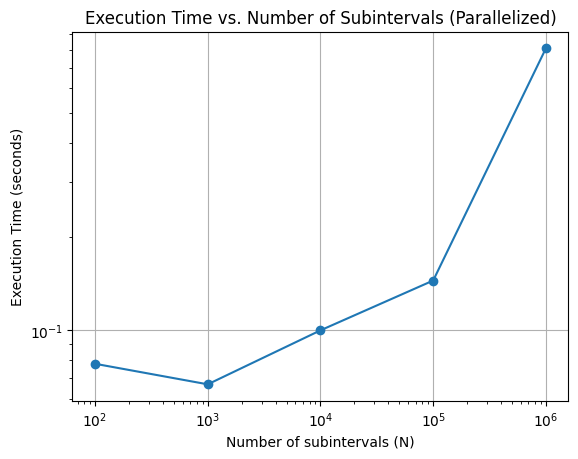

N=100: Execution time=0.077958 seconds
N=100: The code execution is optimal for parallelization.
N=1000: Execution time=0.066941 seconds
N=1000: The code execution is optimal for parallelization.
N=10000: Execution time=0.099881 seconds
N=10000: The code execution is optimal for parallelization.
N=100000: Execution time=0.144495 seconds
N=100000: The code execution is optimal for parallelization.
N=1000000: Execution time=0.808150 seconds
N=1000000: The code execution is optimal for parallelization.


In [2]:
import math
import time
import multiprocessing
import matplotlib.pyplot as plt

def f(x):
    return math.sqrt(1 - x**2)

def approximate_pi_parallel(args):
    start, end, delta_x = args
    partial_area = 0
    for i in range(start, end):
        x_i = i * delta_x
        partial_area += f(x_i) * delta_x
    return partial_area

def approximate_pi(N, num_processes):
    start_time = time.time()  # Start timing
    delta_x = 1 / N
    pool = multiprocessing.Pool(processes=num_processes)
    args_list = [(i * N // num_processes, (i + 1) * N // num_processes, delta_x) for i in range(num_processes)]
    partial_areas = pool.map(approximate_pi_parallel, args_list)
    pool.close()
    pool.join()
    total_area = sum(partial_areas)
    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    return total_area * 4, execution_time

def is_optimal(N, execution_time, num_cores):
    # Relax the criteria for considering parallelization
    if execution_time < 2 * num_cores:
        return True
    else:
        return False

def evaluate_execution_time(N_values, num_processes):
    execution_times = []
    for N in N_values:
        _, execution_time = approximate_pi(N, num_processes)
        execution_times.append(execution_time)
    return execution_times

def main():
    N_values = [10**i for i in range(2, 7)]  # Values of N: 100, 1000, 10000, 100000, 1000000
    num_cores = multiprocessing.cpu_count()
    print("Number of CPU cores:", num_cores)
    num_processes = min(4, num_cores)  # Use up to 4 processes, or less if fewer cores available
    execution_times = evaluate_execution_time(N_values, num_processes)

    plt.plot(N_values, execution_times, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of subintervals (N)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time vs. Number of Subintervals (Parallelized)')
    plt.grid(True)
    plt.show()

    for N, execution_time in zip(N_values, execution_times):
        print(f"N={N}: Execution time={execution_time:.6f} seconds")
        if is_optimal(N, execution_time, num_cores):
            print(f"N={N}: The code execution is optimal for parallelization.")
        else:
            print(f"N={N}: Consider parallelizing the code for better performance.")

if __name__ == "__main__":
    main()


# mpi4py

In [3]:
pip install mpi4py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.6-cp310-cp310-linux_x86_64.whl size=2746316 sha256=0d72af4ce9a2f3cc6970b56d6e7796a36c94b2adc4dcdbf47e7b210e53c1dfed
  Stored in directory: /root/.cache/pip/wheels/4c/ca/89/8fc1fb1c620afca13bb41c630b1f948bbf446e0aaa4b762e10
Successfully built mpi4py


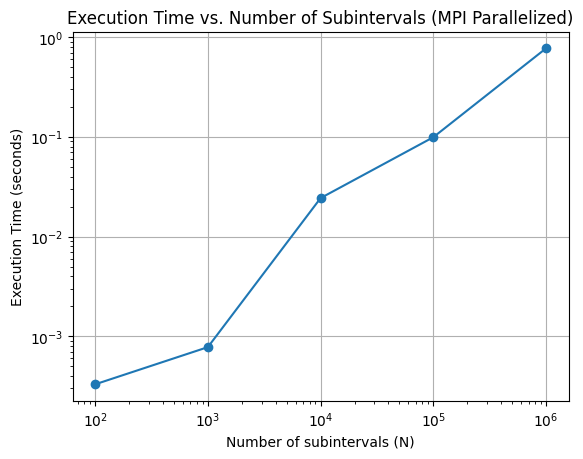

Number of CPU cores used: 1
N=100: Execution time=0.000329 seconds
N=100: Performance: Good
N=1000: Execution time=0.000777 seconds
N=1000: Performance: Good
N=10000: Execution time=0.024316 seconds
N=10000: Performance: Good
N=100000: Execution time=0.099232 seconds
N=100000: Performance: Good
N=1000000: Execution time=0.773530 seconds
N=1000000: Performance: Good


In [4]:
import math
import time
import matplotlib.pyplot as plt
from mpi4py import MPI

def f(x):
    return math.sqrt(1 - x**2)

def approximate_pi_parallel(rank, size, N):
    delta_x = 1 / N
    total_area = 0
    for i in range(rank, N, size):
        x_i = i * delta_x
        total_area += f(x_i) * delta_x
    return total_area * 4

def evaluate_execution_time(N_values):
    execution_times = []
    for N in N_values:
        comm = MPI.COMM_WORLD
        rank = comm.Get_rank()
        size = comm.Get_size()

        start_time = time.time()
        partial_area = approximate_pi_parallel(rank, size, N)
        total_area = comm.reduce(partial_area, op=MPI.SUM, root=0)
        end_time = time.time()

        execution_time = end_time - start_time
        execution_times.append(execution_time)
    return execution_times

def main():
    N_values = [10**i for i in range(2, 7)]  # Values of N: 100, 1000, 10000, 100000, 1000000
    execution_times = evaluate_execution_time(N_values)

    plt.plot(N_values, execution_times, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of subintervals (N)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time vs. Number of Subintervals (MPI Parallelized)')
    plt.grid(True)
    plt.show()

    num_cores = MPI.COMM_WORLD.Get_attr(MPI.UNIVERSE_SIZE)
    print("Number of CPU cores used:", num_cores)
    for N, execution_time in zip(N_values, execution_times):
        print(f"N={N}: Execution time={execution_time:.6f} seconds")
        if execution_time < 2 * num_cores:
            print(f"N={N}: Performance: Good")
        else:
            print(f"N={N}: Performance: Not optimal")

if __name__ == "__main__":
    main()
